# Preprocess data for Tictanic

In [152]:
%matplotlib inline

# for seaborn issue:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

sns.set(style='white', context='notebook', palette='deep')

In [2]:
X_train = pd.read_csv('./data/train.csv')
X_predict = pd.read_csv('./data/test.csv')

In [3]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
X_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


So, in the training dataset, there are some missing data

In [7]:
print(X_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
X_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
print(X_predict.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
surv = X_train[X_train['Survived']==1]
nosurv = X_train[X_train['Survived']==0]

surv_color = 'blue'
nosurv_color = 'red'

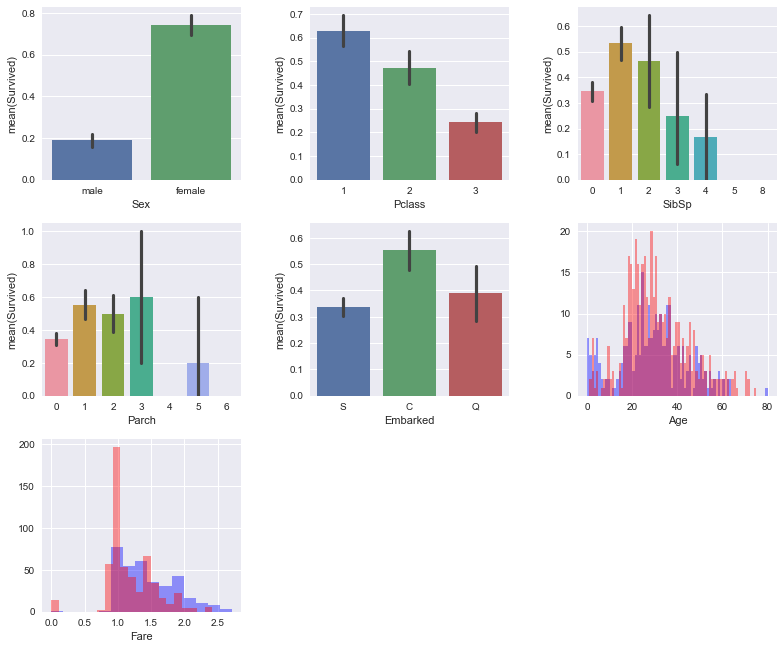

In [19]:
plt.figure(figsize=[12, 10])

plt.subplot(331)
sns.barplot('Sex', 'Survived', data=X_train)

plt.subplot(332)
sns.barplot('Pclass', 'Survived', data=X_train)

plt.subplot(333)
sns.barplot('SibSp', 'Survived', data=X_train)

plt.subplot(334)
sns.barplot('Parch', 'Survived', data=X_train)

plt.subplot(335)
sns.barplot('Embarked', 'Survived', data=X_train)

plt.subplot(336)
sns.distplot(surv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_color)
sns.distplot(nosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_color, axlabel='Age')

plt.subplot(337)
sns.distplot(np.log10(surv['Fare'].dropna().values+1), kde=False, color=surv_color)
sns.distplot(np.log10(nosurv['Fare'].dropna().values+1), kde=False, color=nosurv_color, axlabel='Fare')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

### For the first glance

    1. Female survived better than Male
    2. Survival rate decrease with Pclass
    3. Passenger travelling with SibSp in small group (1-2) generally have a better survival rate
    4. Travelling with Parch in small group also shows a better survival rate
    5. More passengers embarked in port C survived than the others
    6. Children especially babies have a higher survival rate
    7. Survival rate increases with Fare price

In [21]:
print (pd.crosstab(X_train['SibSp'], X_train['Survived']))

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


Though the survival rate is higher for SibSp with 1 and 2, any other size larger than that do not have enought sample to support the conclusion

In [22]:
X_train.loc[:,['Survived','Cabin']].dropna().head(8)

,Survived,Cabin
1,1,C85
3,1,C123
6,0,E46
10,1,G6
11,1,C103
21,1,D56
23,1,A6
27,0,C23 C25 C27


In [26]:
X_train.loc[27]

PassengerId                                28
Survived                                    0
Pclass                                      1
Name           Fortune, Mr. Charles Alexander
Sex                                      male
Age                                        19
SibSp                                       3
Parch                                       2
Ticket                                  19950
Fare                                      263
Cabin                             C23 C25 C27
Embarked                                    S
Name: 27, dtype: object

In [68]:
#X_train[X_train['Cabin'].length > 0]
df = X_train[['Name', 'Cabin']].dropna()
multiple_cabin = df['Cabin'].str.split(' ', expand=True)
multiple_cabin[multiple_cabin[1].notnull()]

multiple_cabin.count()

0    204
1     24
2      8
3      2
dtype: int64

In [69]:
multiple_cabin[multiple_cabin[3].notnull()]

,0,1,2,3
311,B57,B59,B63,B66
742,B57,B59,B63,B66


In [82]:
X_train.loc[X_train['PassengerId'].isin([312, 743])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C


In [85]:
X_train.loc[X_train['PassengerId'].isin([28, 89, 342, 439, 680, 873])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S


In [100]:
index = multiple_cabin[multiple_cabin[1].notnull() & multiple_cabin[2].isnull()].index + 1
X_train.loc[X_train['PassengerId'].isin(index)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,F G73,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,D10 D12,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.00,1,2,113760,120.0000,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


### Observations

    1. Passengers have multiple Cabin values are normally a Family, and sometimes they shared the same ticket. 
    2. There are 4 values have adnormal pattern that start with 'F', it could be typo mistakes.

In [102]:
grouped = X_train.groupby('Ticket')

k = 0
for name, group in grouped:
    if (len(grouped.get_group(name)) > 1):
        print(group.loc[:, ['Survived','Name', 'Fare', 'Sex']])
        k += 1
    if (k>10):
        break

     Survived                                               Name  Fare     Sex
257         1                               Cherry, Miss. Gladys  86.5  female
504         1                              Maioni, Miss. Roberta  86.5  female
759         1  Rothes, the Countess. of (Lucy Noel Martha Dye...  86.5  female
     Survived                                    Name   Fare     Sex
262         0                       Taussig, Mr. Emil  79.65    male
558         1  Taussig, Mrs. Emil (Tillie Mandelbaum)  79.65  female
585         1                     Taussig, Miss. Ruth  79.65  female
     Survived                            Name  Fare   Sex
110         0  Porter, Mr. Walter Chamberlain  52.0  male
475         0     Clifford, Mr. George Quincy  52.0  male
     Survived                                             Name     Fare  \
329         1                     Hippach, Miss. Jean Gertrude  57.9792   
523         1  Hippach, Mrs. Louis Albert (Ida Sophia Fischer)  57.9792   

        

### Observations

As expected, female in a family group generally have higher chance of survival, however, this is not a strong 
evidence as the sample is not large enought.

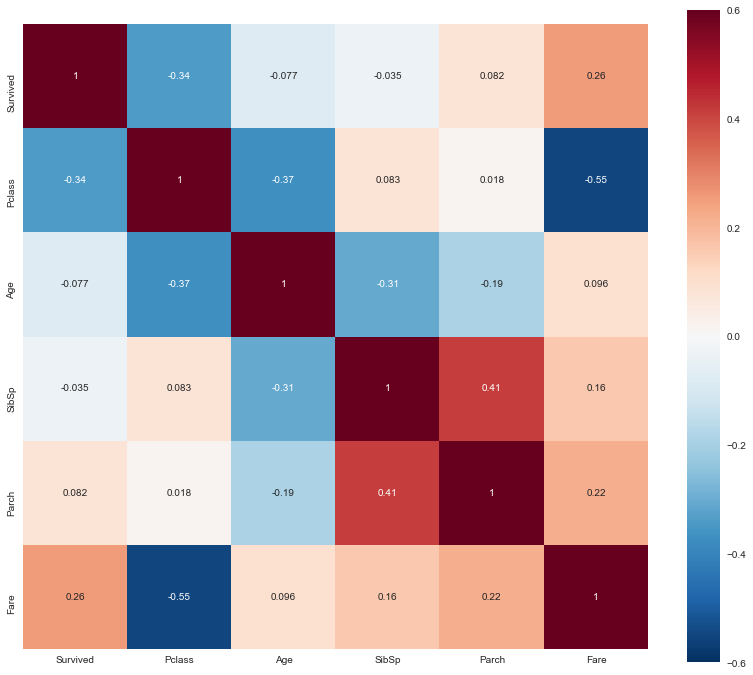

In [105]:
plt.figure(figsize=(14,12))
foo = sns.heatmap(X_train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

### Observations

    1. Pclass is higher correlated with Fare price, as expected
    2. As well as Pclass is correlated with Survived
    3. SibSp and Parch are correlated, which is normal

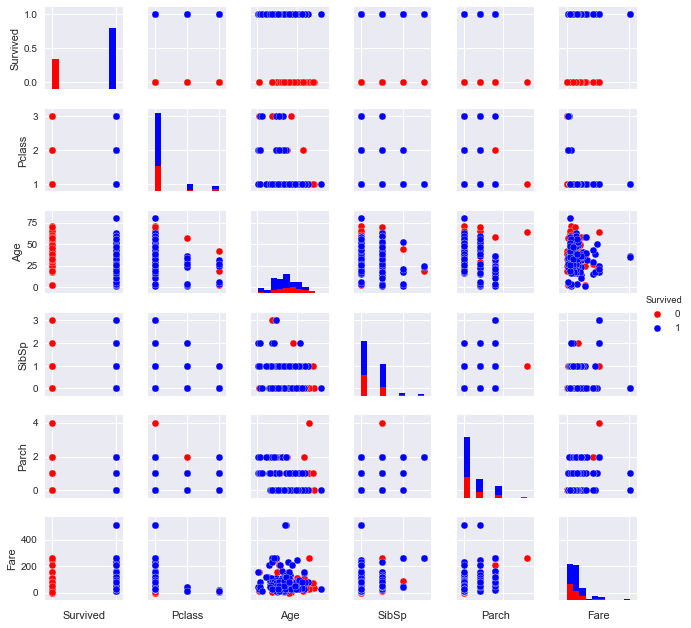

In [108]:
cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
g = sns.pairplot(data=X_train.dropna(), vars=cols, size=1.5, hue='Survived', palette=[nosurv_color, surv_color])
g.set(xticklabels=[])

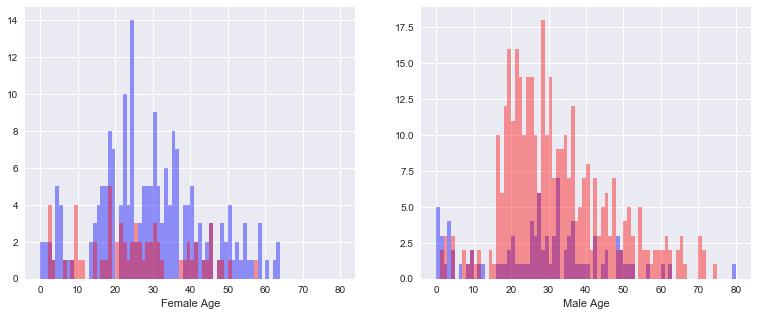

In [114]:
msurv = X_train[(X_train['Survived'] == 1) & (X_train['Sex'] == 'male')]
mno_surv = X_train[(X_train['Survived'] == 0) & (X_train['Sex'] == 'male')]
fsurv = X_train[(X_train['Survived'] == 1) & (X_train['Sex'] == 'female')]
fno_surv = X_train[(X_train['Survived'] == 0) & (X_train['Sex'] == 'female')]

plt.figure(figsize=[13, 5])
plt.subplot(121)
sns.distplot(fsurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_color)
sns.distplot(fno_surv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_color,
            axlabel='Female Age')
plt.subplot(122)
sns.distplot(msurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_color)
sns.distplot(mno_surv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_color,
            axlabel='Male Age')

### Observations

    1. Male age in between 20 and 40 were hardly to survive
    2. Baby boys are on the opposite side, however

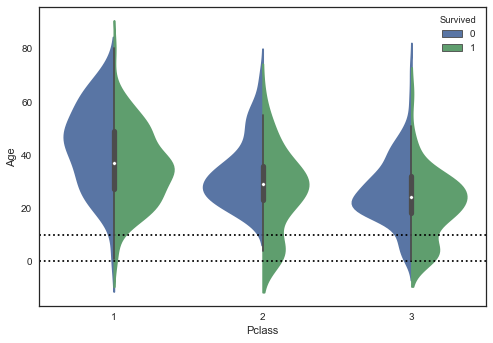

In [158]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=X_train, split=True)
plt.hlines([0, 10], xmin=-1, xmax=3, linestyles="dotted")

### Observations

    1. Pclass = 1 did not have as many as children than the other two classes
    2. Children in Pclass = 2 and Pclass = 3 have higher survivual rate   

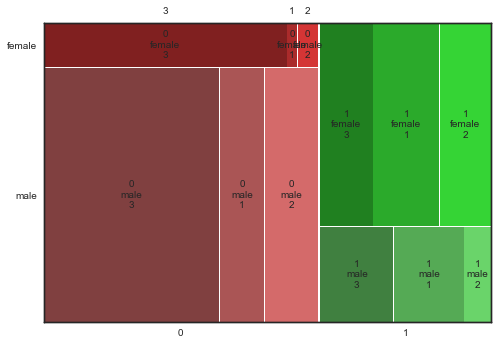

In [156]:
foo = mosaic(X_train, ["Survived", "Sex", "Pclass"])

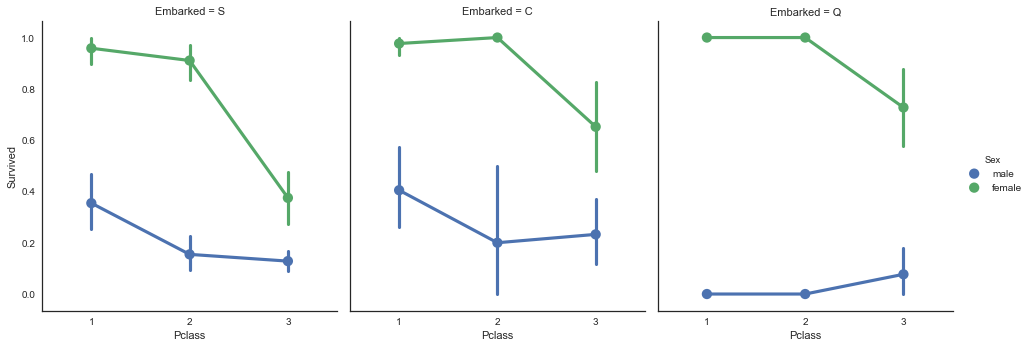

In [157]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", col="Embarked",
                   data=X_train, aspect=0.9, size=5, ci=95.0)

### Observations

    1. Almost all female that died are in Pclass = 3
    2. Male embarked at port Q have very low survivual rate
    3. Still Pclass = 3 are generally lower chance to survive

Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


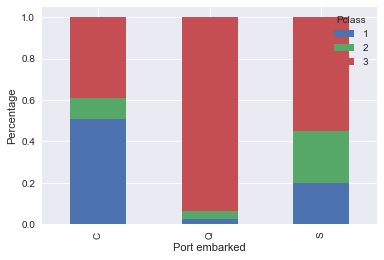

In [140]:
tab = pd.crosstab(X_train['Embarked'], X_train['Pclass'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Port embarked')
dummy = plt.ylabel('Percentage')

### Observations

    1. Passengers embarked at port Q were mostly Pclass = 3

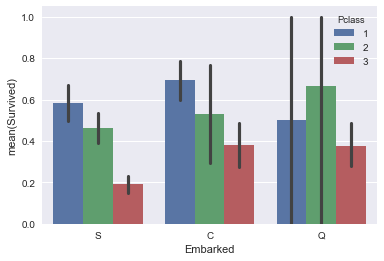

In [142]:
sns.barplot(x="Embarked", y="Survived", hue="Pclass", data=X_train)

Sex       female  male
Embarked              
C             73    95
Q             36    41
S            203   441


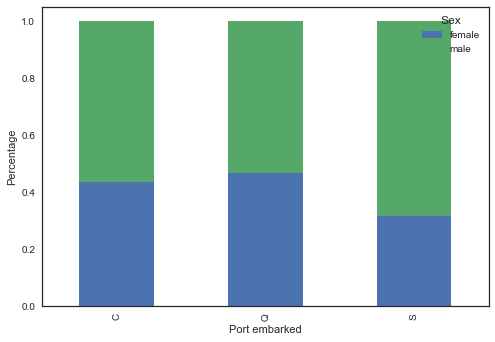

In [155]:
tab = pd.crosstab(X_train['Embarked'], X_train['Sex'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Port embarked')
dummy = plt.ylabel('Percentage')

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


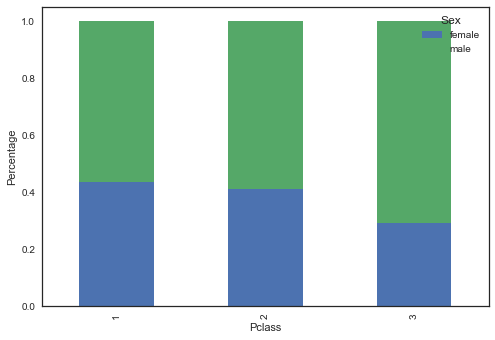

In [154]:
tab = pd.crosstab(X_train['Pclass'], X_train['Sex'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
dummy = plt.xlabel('Pclass')
dummy = plt.ylabel('Percentage')

Sex    female  male
SibSp              
0         174   434
1         106   103
2          13    15
3          11     5
4           6    12
5           1     4
8           3     4
Sex    female  male
Parch              
0         194   484
1          60    58
2          49    31
3           4     1
4           2     2
5           4     1
6           1     0


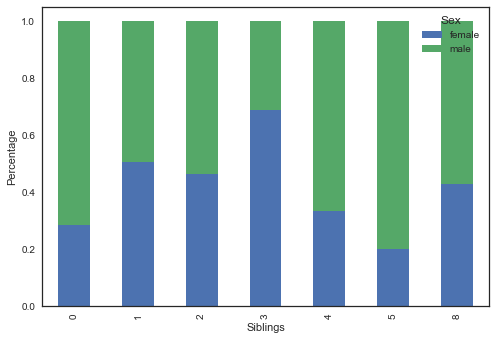

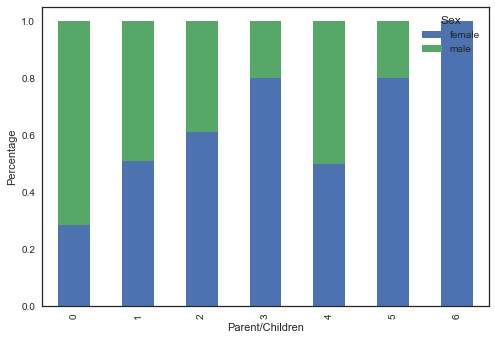

In [153]:
sib = pd.crosstab(X_train['SibSp'], X_train['Sex'])
print(sib)
dummy = sib.div(sib.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Siblings')
dummy = plt.ylabel('Percentage')

parch = pd.crosstab(X_train['Parch'], X_train['Sex'])
print(parch)
dummy = parch.div(parch.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Parent/Children')
dummy = plt.ylabel('Percentage')

### Observations

    1.

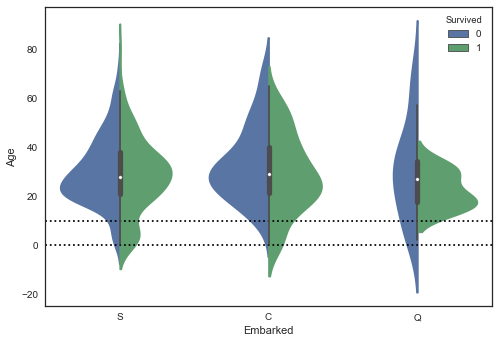

In [160]:
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=X_train, split=True)
plt.hlines([0,10], xmin=-1, xmax=3, linestyles="dotted")

### Observations

    1.

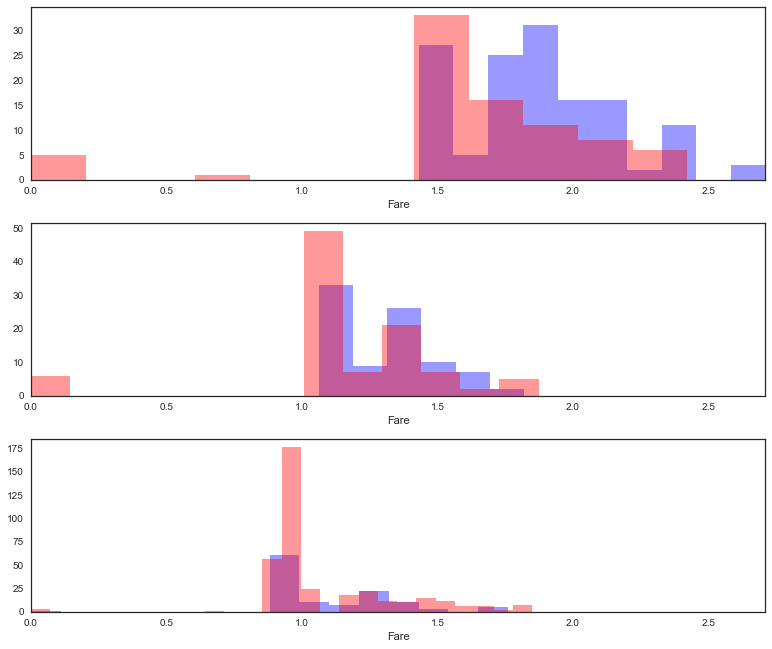

In [162]:
plt.figure(figsize=[12,10])

plt.subplot(311)
ax1 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==1].dropna().values+1), kde=False, color=surv_color)
ax1 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==1].dropna().values+1), kde=False, color=nosurv_color, axlabel='Fare')
ax1.set_xlim(0,np.max(np.log10(X_train['Fare'].dropna().values)))

plt.subplot(312)
ax2 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==2].dropna().values+1), kde=False, color=surv_color)
ax2 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==2].dropna().values+1), kde=False, color=nosurv_color, axlabel='Fare')
ax2.set_xlim(0,np.max(np.log10(X_train['Fare'].dropna().values)))

plt.subplot(313)
ax3 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==3].dropna().values+1), kde=False, color=surv_color)
ax3 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==3].dropna().values+1), kde=False, color=nosurv_color, axlabel='Fare')
ax3.set_xlim(0,np.max(np.log10(X_train['Fare'].dropna().values)))

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

### Observations

    1.

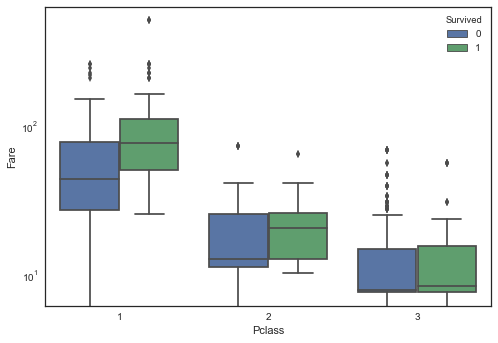

In [163]:
ax = sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=X_train);
ax.set_yscale('log')

## Proprocess the data

There are 2 missing values in **Embarked**

In [165]:
print(X_train[X_train['Embarked'].isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


In [170]:
X_train.where((X_train['Pclass'] < 1.5) & \
    (X_train['Sex'] == "female")).groupby(['Embarked','Pclass','Sex','Parch','SibSp']).size()

Embarked  Pclass  Sex     Parch  SibSp
C         1.0     female  0.0    0.0      18
                                 1.0      15
                          1.0    0.0       4
                                 1.0       3
                          2.0    0.0       1
                                 2.0       2
Q         1.0     female  0.0    1.0       1
S         1.0     female  0.0    0.0      14
                                 1.0      13
                                 2.0       1
                          1.0    0.0       6
                                 1.0       4
                          2.0    0.0       4
                                 1.0       4
                                 3.0       2
dtype: int64

In [171]:
X_train['Embarked'].iloc[61] = "C"
X_train['Embarked'].iloc[829] = "C"

There is 1 missing value of **Fare** in the **prediction dataset**

In [174]:
print(X_predict[X_predict['Fare'].isnull()])

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


I guess we can mock this value using the average fare from **Pclass = 3** and **Embarked = S**

In [184]:
df = X_train[(X_train['Pclass'] == 3) & (X_train['Embarked'] == 'S') &\
            (X_train['SibSp'] == 0) & (X_train['Parch'] == 0)]
print('Mean: %.1f' % df['Fare'].mean())
print('Median: %.1f' % df['Fare'].median())

Mean: 9.7
Median: 7.9


In [186]:
X_predict['Fare'].iloc[152] = df['Fare'].median()

In [189]:
X_train[X_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
